This project was created for the final project of a machine learning class at UCF. My partner and I set out to train an accurate 2D convolutional neural network that classifies images of American Sign Language symbols to their appropriate letters. The dataset consists of a pre made 80/20 train-test split in which each labelled 28x28 image has each of their 784 pixels' greyscale values. This dataset excludes the labels 9 and 25 which correspond to J and Z as these letters require gestures. Using keras library functions, we were able to achieve a very high accuracy and F1 score with our model.

This was also a kaggle challenge, though we did not participate in it; the dataset can be found at the kaggle link below.

https://www.kaggle.com/datamunge/sign-language-mnist

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from sklearn.metrics import classification_report

In [ ]:
# Importing
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

# Shuffling
train_df.sample(frac=1)
test_df.sample(frac=1)

In [ ]:
# Setting x and y
y_train = train_df['label']
y_test = test_df['label']
x_train = train_df.drop(["label"], axis=1)
x_test = test_df.drop(["label"], axis=1)

# Normalization
x_train /= 255
x_test /= 255

# Reshaping
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

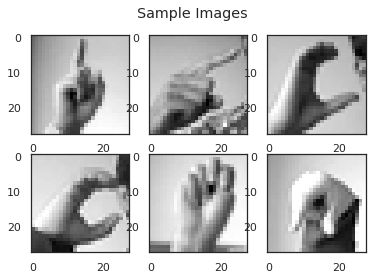

In [ ]:
f, axes = plt.subplots(2,3)
f.suptitle('Sample Images')
img = 0
for i in range(2):
  for j in range(3):
    axes[i,j].imshow(x_train[img].reshape(28, 28), cmap="gray")
    img += 1

Text(0.5, 1.0, 'Frequency of Each Letter')

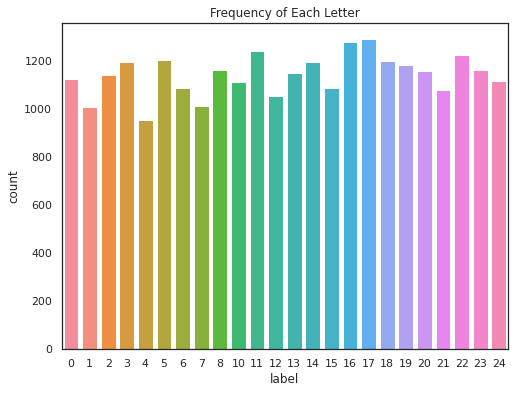

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=y_train, saturation=0.9)
plt.title("Frequency of Each Letter")

The dataset is approximately balanced

**Building the CNN**

Our model consists of four convolusional layers, with all but the last being followed by a Max Pooling layer. After the first layer, Batch Normalization is applied. Subsequently, a Dropout layer of 0.3 probability was applied to help prevent overfitting.

The model was then flattened and given a relu activated dense layer prior to the final softmax activated dense layer. We found that adding a 0.25 probability dropout inbetween the last dense layers slightly improved our accuracy.

We concluded batch size of 128 over 25 epochs best illustrated the model's performance.

Our model utilizes a learning rate reduction function was implemented using the ReduceLRonPlateau function from keras. This gave our results much less variance per run, and somewhat improved our performance.

In [ ]:
model = Sequential()

model.add(Conv2D(49, (4,4), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((4,4), strides=2, padding='same'))

model.add(Conv2D(98, (4,4), activation='relu'))
model.add(MaxPool2D((4,4), strides=1, padding='same'))

model.add(Conv2D(196, (4,4), activation='relu'))
model.add(MaxPool2D((4,4), strides=2, padding='same'))

model.add(Conv2D(196, (4,4), activation='relu'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(49, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(25, activation='softmax'))

epochs = 25
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.3, min_lr=0.0001)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/25
215/215 [==============================] - 3s 14ms/step - loss: 1.4616 - accuracy: 0.5448 - val_loss: 2.4584 - val_accuracy: 0.5073
Epoch 2/25
215/215 [==============================] - 3s 13ms/step - loss: 0.1405 - accuracy: 0.9534 - val_loss: 0.4627 - val_accuracy: 0.8907
Epoch 3/25
215/215 [==============================] - 3s 13ms/step - loss: 0.0546 - accuracy: 0.9829 - val_loss: 0.0869 - val_accuracy: 0.9767
Epoch 4/25
215/215 [==============================] - 3s 13ms/step - loss: 0.0336 - accuracy: 0.9899 - val_loss: 0.0803 - val_accuracy: 0.9815
Epoch 5/25
215/215 [==============================] - 3s 13ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0896 - val_accuracy: 0.9746
Epoch 6/25
215/215 [==============================] - 3s 13ms/step - loss: 0.0405 - accuracy: 0.9889 - val_loss: 0.7156 - val_accuracy: 0.8148
Epoch 7/25
215/215 [==============================] - 3s 13ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0580 - val_accuracy: 0.9847

In [ ]:
predictions = model.predict_classes(x_test, batch_size=128)
labels = ["Label " + str(i) for i in range(25) if i != 9]
print(classification_report(y_test, predictions, target_names = labels))

              precision    recall  f1-score   support

     Label 0       1.00      1.00      1.00       331
     Label 1       1.00      1.00      1.00       432
     Label 2       1.00      1.00      1.00       310
     Label 3       1.00      1.00      1.00       245
     Label 4       1.00      1.00      1.00       498
     Label 5       1.00      1.00      1.00       247
     Label 6       0.98      1.00      0.99       348
     Label 7       1.00      0.99      0.99       436
     Label 8       1.00      1.00      1.00       288
    Label 10       1.00      1.00      1.00       331
    Label 11       1.00      1.00      1.00       209
    Label 12       1.00      1.00      1.00       394
    Label 13       1.00      1.00      1.00       291
    Label 14       1.00      1.00      1.00       246
    Label 15       1.00      1.00      1.00       347
    Label 16       1.00      1.00      1.00       164
    Label 17       1.00      1.00      1.00       144
    Label 18       1.00    

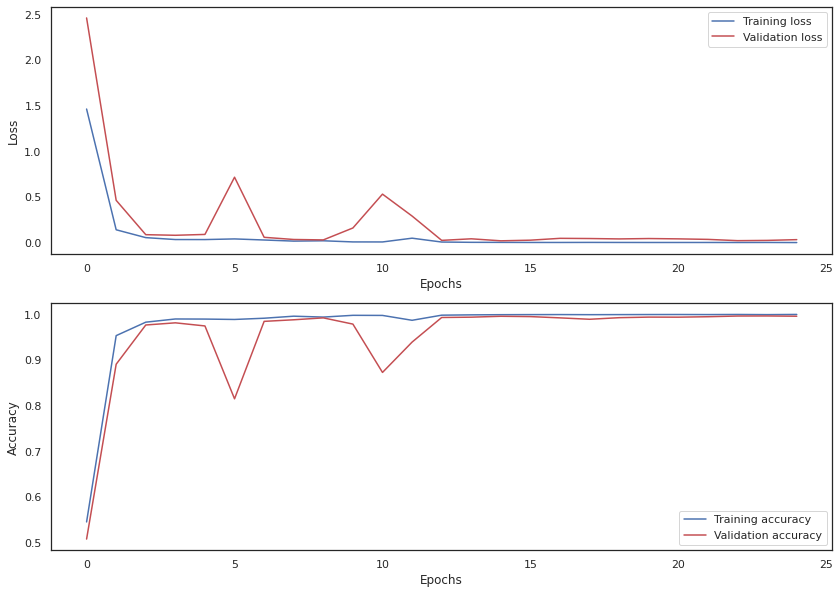

In [ ]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches(14,10)
axes[0].plot(history.history['loss'], color='b', label="Training loss")
axes[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =axes[0])
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
legend = axes[0].legend()

axes[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
axes[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
legend = axes[1].legend()

**Evaluation**

Because our dataset was approximately balanced, we decided to use standard accuracy and F1 score as measures of our model's performance. We used the provided keras function for accuracy, in addition to sourcing the F1 score function from scikit-learn. In testing, our model outperformed our own expectations, reaching an average F1 accuracy score of 1.0. This was comparable to the top performing models listed on kaggle.